# Lasso Regression Model

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LassoCV
from sklearn.metrics import mean_absolute_error

In [2]:
df=pd.read_csv('clean_salary_data.csv')
pd.set_option('display.max_columns', None)
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,simplified_title,seniority,salary_range,min_salary,max_salary,avg_salary,company_age,company_name,state,city,headquarters_state,same_location,size_range,min_size,max_size,avg_size,python,sql,excel,R,deep_learning,PhD,bachelor,masters,power_bi,tableau,prob_solver,critical_thinker
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,data analyst,na,$37-$66,37,66,51.5,60,Vera Institute of Justice,NY,New York,NY,1,201 to 500,201,500,350.5,1,1,0,1,0,0,1,0,0,0,0,0
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1,data analyst,na,$37-$66,37,66,51.5,128,Visiting Nurse Service of New York,NY,New York,NY,1,10000+,10000,30000,20000.0,0,1,1,1,0,0,1,1,0,0,0,0
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1,data analyst,senior,$37-$66,37,66,51.5,18,Squarespace,NY,New York,NY,1,1001 to 5000,1001,5000,3000.5,1,1,1,1,0,1,1,0,0,1,0,0
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,data analyst,na,$37-$66,37,66,51.5,19,Celerity,NY,New York,VA,0,201 to 500,201,500,350.5,0,1,0,1,0,0,1,0,0,1,0,0
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,data analyst,na,$37-$66,37,66,51.5,12,FanDuel,NY,New York,NY,1,501 to 1000,501,1000,750.5,1,1,1,1,0,0,1,0,0,0,0,0


In [3]:
#gather the feature matrix and target variable. Picked variables that are not collinear. We will choose more variables
#for a ridge regression model. 

#potential features to analyze based on information from the EDA Notebook 
features=['Rating', 'Type of ownership', 'Sector', 'Revenue', 'simplified_title', 'seniority', 'company_age',
       'state', 'same_location', 'python', 'sql', 'excel',
       'deep_learning', 'PhD', 'bachelor', 'masters', 'power_bi', 'tableau', 'avg_salary']

#create the data frame needed for the modeling 
df_inter=df[features]

#one hot endode the variables 
df_dummies=pd.get_dummies(df_inter)

#Create the feature matrix, target variable, and train test splits 
X=df_dummies.drop('avg_salary', axis=1)
y=df_dummies.avg_salary

X_train, X_val, y_train, y_val=train_test_split(X, y, test_size=0.30, random_state=42)

In [4]:
#Lasso Regression: neg_mean_square_root_errors
alphas=np.arange(.01,1, .01)
mean_square_root_scores=[]

for alpha in alphas: 
    lr=Lasso(alpha=alpha, normalize=True)
    score=np.mean(cross_val_score(lr,X_train,y_train,scoring = 'neg_root_mean_squared_error', cv= 5))
    mean_square_root_scores.append(score)

rmse=list(np.abs(np.array(mean_square_root_scores)))
#rmse

In [5]:
#Lasso Regression: neg_mean_absolute_errors
alphas=np.arange(.01,1, .01)
mean_absolute_scores=[]

for alpha in alphas: 
    lr=Lasso(alpha=alpha, normalize=True)
    score=np.mean(cross_val_score(lr,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 5))
    mean_absolute_scores.append(score)
mae=list(np.abs(np.array(mean_absolute_scores)))      

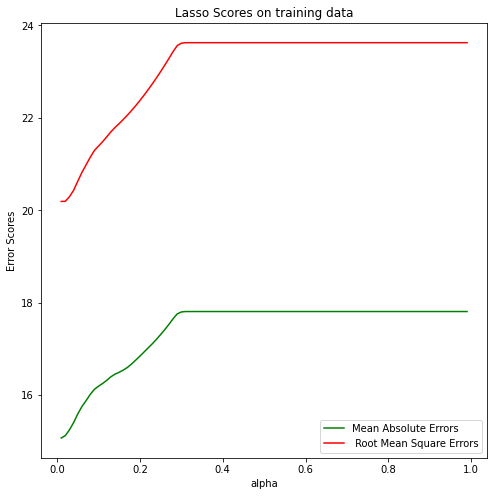

In [6]:
#plot the absolute error lines for the mean absolute errors and the mean square root error 
plt.figure(figsize=(8,8))
plt.plot(np.arange(.01,1, .01), mae, 'g', label='Mean Absolute Errors')
plt.plot(np.arange(.01,1, .01), rmse, 'r', label=' Root Mean Square Errors')
plt.xlabel('alpha')
plt.ylabel('Error Scores')
plt.legend()
plt.title("Lasso Scores on training data")
plt.show()

In [7]:
#Run a gridsearch on the best possible model for the alpha and see what we can get. 
#create a pipeline to scale the data beforehand
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [8]:
#lets find the optimal alpha for the lasso model. We will test values of alpha from .1 to 1 in .1 increments. 
#Moreover, we will use 5 fold cross validation and select the value of alpha that minimizes the MAE 
grid_search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(.01,1, .01)},
                      cv = 5, scoring="neg_mean_absolute_error"
                      )

In [9]:
#train the grid search 
grid_search.fit(X_train, y_train)

#Find the best alpha value 
print("The best alpha value on training data is ", grid_search.best_params_)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147.2645209970069, tolerance: 70.59404928571429
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87.67392769700382, tolerance: 69.11303374306107
  model = cd_fast.enet_coordinate_descent(


The best alpha value on training data is  {'model__alpha': 0.42000000000000004}


In [10]:
#Check this value of alpha on the cross validated data 
lr=Lasso(alpha=grid_search.best_params_['model__alpha'], normalize=True)
np.mean(np.abs(cross_val_score(lr, X_train, y_train, scoring='neg_mean_absolute_error')))

17.807870346337005

##### Testing the model on the validation set. 

In [11]:
#Lasso Regression: neg_mean_absolute_errors for validation data 
alphas=np.arange(.01,1, .01)
mean_absolute_scores_valid=[]

for alpha in alphas: 
    lr=Lasso(alpha=alpha, normalize=True)
    lr.fit(X_train, y_train)
    y_lr=lr.predict(X_val)
    score=mean_absolute_error(y_val, y_lr)
    mean_absolute_scores_valid.append(score)
mae_val=list(np.abs(np.array(mean_absolute_scores_valid))) 

In [12]:
lasso_dict={'alphas': alphas, 'MAE': mae_val}
lasso_df=pd.DataFrame(lasso_dict)
lasso_df.loc[lasso_df.MAE==min(lasso_df.MAE)]
#It looks like the optimal value of alpha that minimizes MAE is going to be 0.01

,alphas,MAE
0,0.01,15.234803


In [13]:
#Test the model on validation data 
lr=Lasso(alpha=.01, normalize=True)
lr.fit(X_train, y_train)
predict=lr.predict(X_val)
mean_absolute_error(y_val, predict)

15.234803084169213

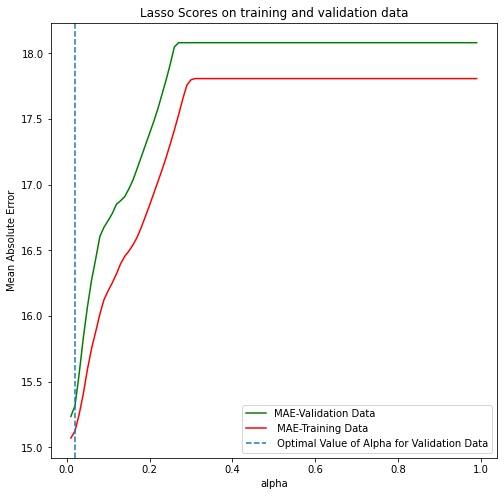

In [14]:
#plot the absolute error lines for the mean absolute errors and the mean square root error 
plt.figure(figsize=(8,8))
plt.plot(np.arange(.01,1, .01), mae_val, 'g', label='MAE-Validation Data')
plt.plot(np.arange(.01,1, .01), mae, 'r', label=' MAE-Training Data')
plt.axvline(x=0.02, linestyle='--', label=' Optimal Value of Alpha for Validation Data')
plt.xlabel('alpha')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title("Lasso Scores on training and validation data")
plt.show()

From these models, it seems that the best measure of model performance would be the mean absolute error. Moreover, the best alpha penalizing factor was approximately 0.01 since this minimizes the MAE on the validation data. 

#### What happens when we use the selected features from the feature selection notebook? 

In [15]:
#What happens on the selected features? These features were selected in the feature_selection notebook 
selected_feats=['python',
 'Type of ownership_Private Practice / Firm',
 'Sector_Arts, Entertainment & Recreation',
 'Sector_Biotech & Pharmaceuticals',
 'Sector_Health Care',
 'Sector_Telecommunications',
 'Revenue_$1 to $5 million (USD)',
 'Revenue_$25 to $50 million (USD)',
 'Revenue_$5 to $10 billion (USD)',
 'simplified_title_data warehouse enginner',
 'seniority_senior',
 'state_ CA',
 'state_ CO',
 'state_ IL']
X_select=df_dummies[selected_feats]
X_select_train, X_select_val, y_train, y_test=train_test_split(X_select, y, test_size=0.3, random_state=0)

In [16]:
#Lasso Regression: neg_mean_absolute_errors on the select features data 
alphas=np.arange(.01,1, .01)
mean_absolute_scores=[]

for alpha in alphas: 
    lr=Lasso(alpha=alpha, normalize=True)
    score=np.mean(cross_val_score(lr,X_select_train,y_train,scoring = 'neg_mean_absolute_error', cv= 5))
    mean_absolute_scores.append(score)
mae_select=list(np.abs(np.array(mean_absolute_scores)))   

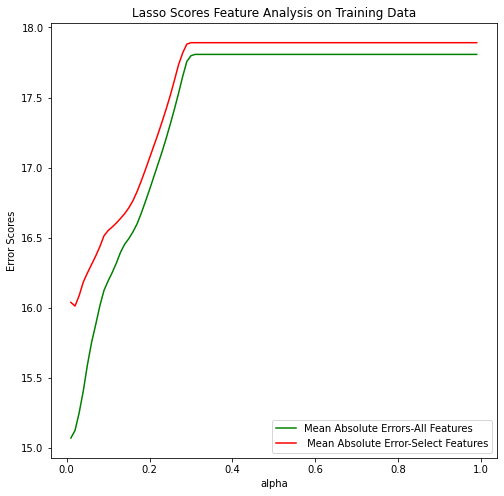

In [17]:
#plot the absolute error lines for the mean absolute errors and the mean square root error 
plt.figure(figsize=(8,8))
plt.plot(np.arange(.01,1, .01), mae, 'g', label='Mean Absolute Errors-All Features')
plt.plot(np.arange(.01,1, .01), mae_select, 'r', label=' Mean Absolute Error-Select Features')
plt.xlabel('alpha')
plt.ylabel('Error Scores')
plt.legend()
plt.title("Lasso Scores Feature Analysis on Training Data")
plt.show()
#It looks like when we include more features we get a little better of a testing score on the MAE than 
#with the select features for lasso.

In [18]:
#Lasso Regression: neg_mean_absolute_errors
alphas=np.arange(.01,1, .01)
mean_absolute_scores_valid_feats=[]

for alpha in alphas: 
    lr=Lasso(alpha=alpha, normalize=True)
    lr.fit(X_select_train, y_train)
    y_lr=lr.predict(X_select_val)
    score=mean_absolute_error(y_test, y_lr)
    mean_absolute_scores_valid_feats.append(score)
mae_val_feats=list(np.abs(np.array(mean_absolute_scores_valid_feats))) 

In [19]:
lasso_dict={'alphas': alphas, 'MAE': mae_val_feats}
lasso_df=pd.DataFrame(lasso_dict)
lasso_df.loc[lasso_df.MAE==min(lasso_df.MAE)] 

,alphas,MAE
1,0.02,16.240266


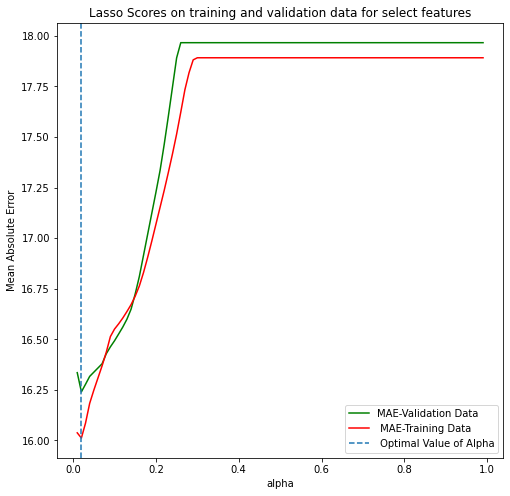

In [20]:
#plot the absolute error lines for the mean absolute errors and the mean square root error 
plt.figure(figsize=(8,8))
plt.plot(np.arange(.01,1, .01), mae_val_feats, 'g', label='MAE-Validation Data')
plt.plot(np.arange(.01,1, .01), mae_select, 'r', label=' MAE-Training Data')
plt.axvline(x=0.02, linestyle='--', label=' Optimal Value of Alpha')
plt.xlabel('alpha')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title("Lasso Scores on training and validation data for select features")
plt.show()

Interesting that the validation data is slightly better but over the long run the validation data slowly worsens. 

## Take a quick look at multiple linear regression

We will also take a look at the multiple linear regression OLS table to see if there was some slight deviation here. 

In [21]:
# multiple linear regression 
import statsmodels.api as sm

X_sm = X = sm.add_constant(X)
mlr = sm.OLS(y,X_sm)
mlr.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_salary   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     11.26
Date:                Sun, 06 Jun 2021   Prob (F-statistic):          1.89e-122
Time:                        17:20:31   Log-Likelihood:                -9885.3
No. Observations:                2252   AIC:                         1.995e+04
Df Residuals:                    2162   BIC:                         2.047e+04
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Rating                                               0.2839      0.407      0.698      0.485      -0.514       1.082
company_age                                         -0.0128      0.014     -0.906      0.365      -0.041       0.015
same_location                                       -0.9074      1.033     -0.878      0.380      -2.934       1.119
python                                               2.0378      1.080      1.887      0.059      -0.080       4.155
sql                                                 -1.5603      1.008     -1.548      0.122      -3.537       0.417
excel                                                0.2482      0.908      0.273      0.785      -1.533       2.029
deep_learning                                       -0.1180      6.207     -0.019      0.985     -12.291      12.055
PhD                                                  5.3423      3.065      1.743      0.082      -0.669      11.354
bachelor                                            36.0240      2.051     17.563      0.000      32.002      40.047
masters                                              0.1844      0.949      0.194      0.846      -1.677       2.046
power_bi                                            -0.9932      1.631     -0.609      0.543      -4.192       2.206
tableau                                              0.3326      1.081      0.308      0.758      -1.788       2.453
Type of ownership_-1                                 4.1226      1.481      2.784      0.005       1.219       7.026
Type of ownership_College / University              11.8688      5.818      2.040      0.041       0.459      23.278
Type of ownership_Company - Private                  2.2440      2.016      1.113      0.266      -1.709       6.197
Type of ownership_Company - Public                   4.1780      2.222      1.880      0.060      -0.180       8.536
Type of ownership_Contract                           5.2496      6.090      0.862      0.389      -6.694      17.193
Type of ownership_Franchise                          4.7971     13.875      0.346      0.730     -22.412      32.006
Type of ownership_Government                        -1.2582      5.477     -0.230      0.818     -11.998       9.482
Type of ownership_Hospital                           6.6779      5.051      1.322      0.186      -3.227      16.583
Type of ownership_Nonprofit Organization            -0.3299      2.741     -0.120      0.904      -5.705       5.045
Type of ownership_Other Organization                 1.9528      5.604      0.348      0.728      -9.036      12.942
Type of ownership_Private Practice / Firm           10.3095      6.619      1.558      0.119      -2.670      23.289
Type of ownership_School / School Distric

From looking at this summary table, the multiple linear regression model is only capturing about 30% of the variance in the data. Ideally, we would like for this to be higher and suggest that another model is needed. There is too much sparsity in the data to find a relationship.  